# users & trips  for Bikes

## Investigation Overview

In this investigation, I wanted to look at the characteristics of bike trips duration ,timing and users that could be used to predict the most important days to maintaine the bikes . 

## Dataset Overview

The data consisted of almost 17000 tripand approximately 15 features , so lets discove the data together :)

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# load in the dataset into a pandas dataframe

bike_df = pd.read_csv("C:/Users/m/Downloads/201902-fordgobike-tripdata.csv")

In [ ]:
# convert, clean data
bike_df=bike_df.dropna()

#change the data type to a more convenient type
type(bike_df['start_time'][0])

bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

type(bike_df['start_time'][0])

type(bike_df['user_type'][0])

bike_df.user_type = bike_df.user_type.astype('category')

bike_df['start_station_id'] = bike_df['start_station_id'].apply(str)

bike_df['end_station_id'] = bike_df['end_station_id'].apply(str)

bike_df.member_gender = bike_df.member_gender.astype('category')

bike_df.bike_share_for_all_trip = bike_df.bike_share_for_all_trip.astype('category')

bike_df['bike_id'] = bike_df['bike_id'].apply(str)

bike_df['member_birth_year'] = bike_df['member_birth_year'].apply(int)

In [ ]:
bike_df.info()

In [42]:
# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
  
# printing todays date
print("Current date: ", todays_date)
  
# fetching the current year, month and day of today
print("Current year:", todays_date.year)
print("Current month:", todays_date.month)
print("Current day:", todays_date.day)

Current date:  2022-01-28
Current year: 2022
Current month: 1
Current day: 28


In [43]:
#feature enginerr
bike_df['month'] = bike_df.start_time.dt.strftime('%b')
bike_df['day'] = bike_df.start_time.dt.strftime('%a')
bike_df['hour'] = bike_df.start_time.dt.strftime('%H')
bike_df['year'] = bike_df.start_time.dt.strftime('%Y');
bike_df['age']= todays_date.year-bike_df.member_birth_year


In [44]:
#get member age using birth_year
age = todays_date.year-bike_df.member_birth_year
print (age)

0         38
2         50
3         33
4         48
5         63
          ..
183407    26
183408    38
183409    32
183410    34
183411    33
Name: member_birth_year, Length: 174952, dtype: int64


## What is the users Age? 



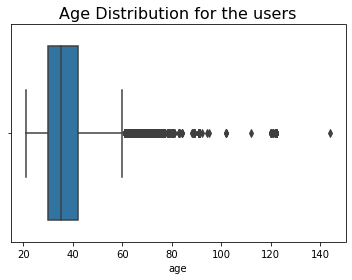

In [45]:
#plot age distribution
sb.boxplot(data=bike_df, x= age, color=sb.color_palette()[0])
plt.xlabel('age')
plt.title('Age Distribution for the users',fontsize=16);

so the younger user is 20 yars old and the older is 144 year ,wow 
the average age of the users is 37 years old.



### How Many trip for each day? 


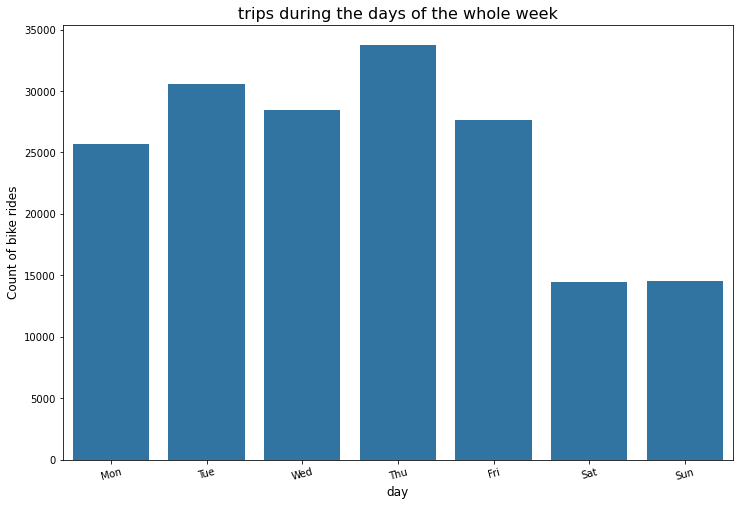

In [46]:
#count rides during the weak 
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[0]
sb.countplot(data=bike_df, x='day',color=base_color, order=["Mon",'Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xticks(rotation=15)
plt.xlabel('day',fontsize=12)
plt.ylabel('Count of bike rides', fontsize=12)
plt.title('trips during the days of the whole week',fontsize=16)
plt.show();

### the less trips are in the weekend.

### what is the rush hour in using bikes ??

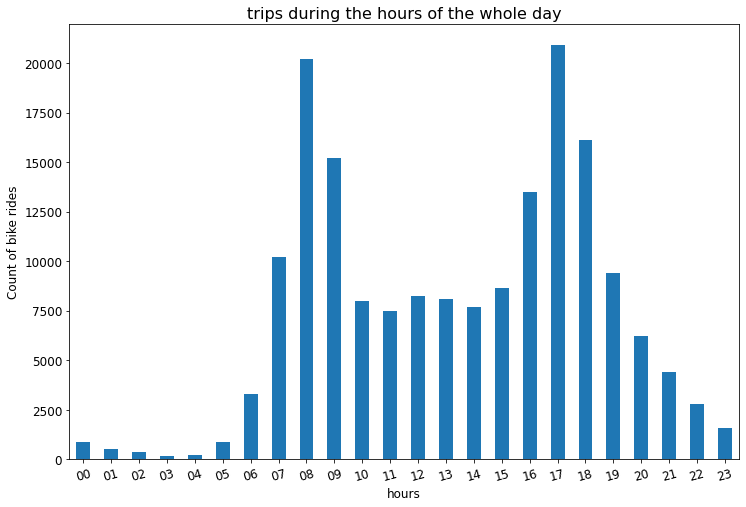

In [47]:
#count the rids during the day hours
plt.figure(figsize=(12,8))
bike_df.groupby(['hour']) ['hour'].count().plot(kind='bar',fontsize=12);
plt.xticks(rotation=15)

plt.xlabel('hours',fontsize=12)
plt.ylabel('Count of bike rides', fontsize=12)
plt.title('trips during the hours of the whole day',fontsize=16)
plt.show();

### The normal Rush Hours at 8 am & 5 pm.

### what is the most important stations ??

In [48]:
#the most important stations ,which will need extra care and mintainance
top_start_station=bike_df['start_station_name'].value_counts().index[:15]
print(top_start_station)


Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Howard St at Beale St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)',
       'The Embarcadero at Sansome St', 'Bancroft Way at Telegraph Ave',
       'Bancroft Way at College Ave', '2nd St at Townsend St',
       'Beale St at Harrison St'],
      dtype='object')


In [49]:
top_ten_start_station = bike_df.loc[bike_df['start_station_name'].isin(top_start_station)]
top_ten_start_station

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour,year,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,Feb,Thu,17,2019,38
14,395,2019-02-28 23:56:26.848,2019-03-01 00:03:01.947,243.0,Bancroft Way at College Ave,37.869360,-122.254337,252.0,Channing Way at Shattuck Ave,37.865847,...,4786,Subscriber,1988,Male,No,Feb,Thu,23,2019,34
23,367,2019-02-28 23:51:06.014,2019-02-28 23:57:13.312,243.0,Bancroft Way at College Ave,37.869360,-122.254337,269.0,Telegraph Ave at Carleton St,37.862320,...,1804,Subscriber,1997,Female,No,Feb,Thu,23,2019,25
26,385,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,6531,Customer,2000,Male,No,Feb,Thu,23,2019,22
38,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58.0,Market St at 10th St,37.776619,-122.417385,145.0,29th St at Church St,37.743684,...,5938,Subscriber,1992,Female,No,Feb,Thu,23,2019,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183387,598,2019-02-01 00:39:12.684,2019-02-01 00:49:10.791,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,245.0,Downtown Berkeley BART,37.870139,...,2055,Subscriber,1999,Male,Yes,Feb,Fri,00,2019,23
183390,232,2019-02-01 00:40:00.035,2019-02-01 00:43:52.880,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,266.0,Parker St at Fulton St,37.862464,...,3756,Subscriber,1999,Male,No,Feb,Fri,00,2019,23
183399,958,2019-02-01 00:12:24.247,2019-02-01 00:28:22.738,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,58.0,Market St at 10th St,37.776619,...,3392,Subscriber,1993,Male,No,Feb,Fri,00,2019,29
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,4832,Subscriber,1996,Male,No,Feb,Fri,00,2019,26


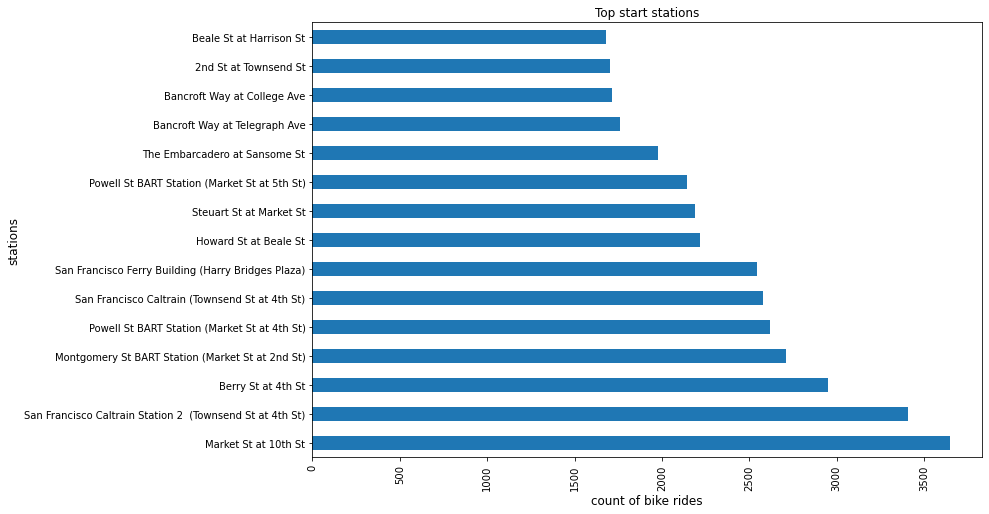

In [50]:
#check the most important start_stations
plt.figure(figsize=(12,8))
top_ten_start_station['start_station_name'].value_counts().plot(kind='barh');
plt.title('Top start stations', fontsize=12)
plt.xlabel('count of bike rides', fontsize=12)
plt.ylabel('stations', fontsize=12);
plt.xticks(rotation=90);

In [51]:
top_end_station=bike_df['end_station_name'].value_counts().index[:15]
print(top_end_station)

Index(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 4th St)', 'Berry St at 4th St',
       'The Embarcadero at Sansome St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)', 'Howard St at Beale St',
       'Beale St at Harrison St', 'Bancroft Way at Telegraph Ave',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       '2nd St at Townsend St'],
      dtype='object')


In [52]:
top_ten_end_station = bike_df.loc[bike_df['end_station_name'].isin(top_end_station)]
top_ten_end_station

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour,year,age
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,Feb,Thu,12,2019,50
26,385,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,6531,Customer,2000,Male,No,Feb,Thu,23,2019,22
31,223,2019-02-28 23:49:27.027,2019-02-28 23:53:10.535,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,50.0,2nd St at Townsend St,37.780526,...,6267,Customer,1993,Male,No,Feb,Thu,23,2019,29
45,717,2019-02-28 23:33:21.095,2019-02-28 23:45:18.510,9.0,Broadway at Battery St,37.798572,-122.400869,58.0,Market St at 10th St,37.776619,...,6581,Subscriber,1980,Male,No,Feb,Thu,23,2019,42
66,457,2019-02-28 23:23:32.035,2019-02-28 23:31:09.406,345.0,Hubbell St at 16th St,37.766483,-122.398279,81.0,Berry St at 4th St,37.775880,...,6132,Subscriber,1982,Female,No,Feb,Thu,23,2019,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183373,954,2019-02-01 00:54:08.960,2019-02-01 01:10:03.869,11.0,Davis St at Jackson St,37.797280,-122.398436,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,545,Subscriber,1974,Male,Yes,Feb,Fri,00,2019,48
183378,659,2019-02-01 00:53:36.143,2019-02-01 01:04:35.371,47.0,4th St at Harrison St,37.780955,-122.399749,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,4960,Subscriber,1985,Other,No,Feb,Fri,00,2019,37
183388,490,2019-02-01 00:39:53.112,2019-02-01 00:48:03.338,61.0,Howard St at 8th St,37.776513,-122.411306,81.0,Berry St at 4th St,37.775880,...,5411,Subscriber,1927,Male,No,Feb,Fri,00,2019,95
183399,958,2019-02-01 00:12:24.247,2019-02-01 00:28:22.738,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,58.0,Market St at 10th St,37.776619,...,3392,Subscriber,1993,Male,No,Feb,Fri,00,2019,29


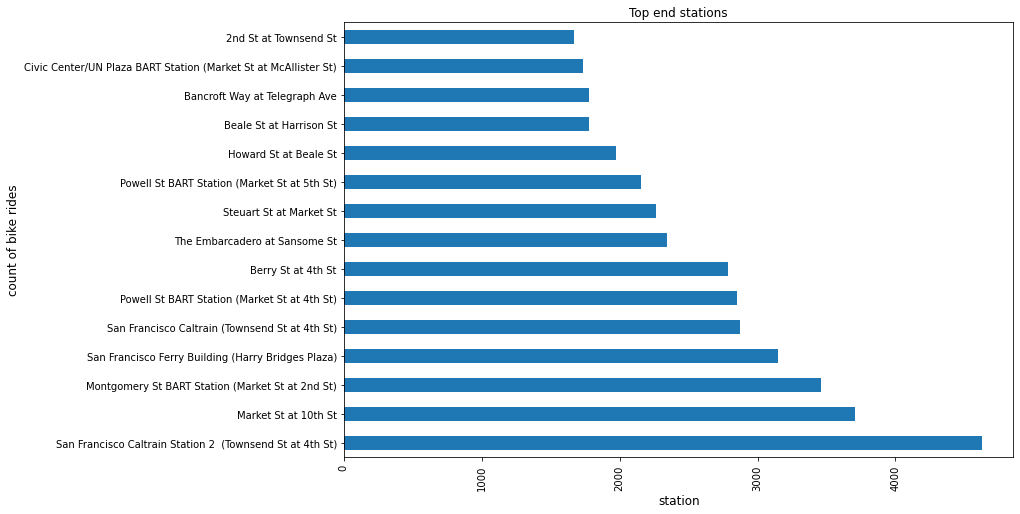

In [53]:
#check the most important end stations
plt.figure(figsize=(12,8))
top_ten_end_station['end_station_name'].value_counts().plot(kind='barh')
plt.title('Top end stations', fontsize=12)
plt.xlabel('station', fontsize=12)
plt.ylabel('count of bike rides', fontsize=12);
plt.xticks(rotation=90);

 <li><a href> it is thursday the most crowded day in the normal rush hours , the most used station is san francisco cattrain station 2& market st 10 , it is the most importat station to care with
) </a></li>

### what is the rides count with user type or gender ?

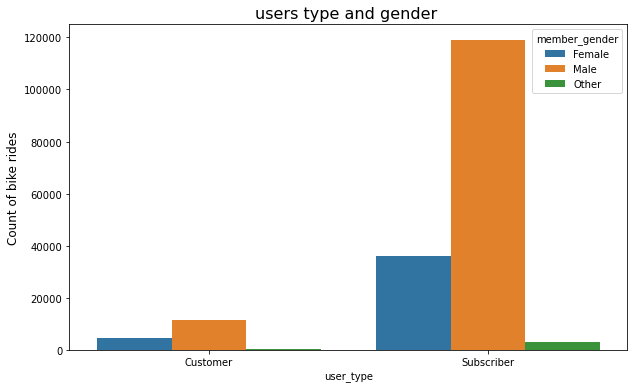

In [54]:
#user type distriburion and corelation with gender

plt.figure(figsize=(10,6))
sb.countplot(data=bike_df, x='user_type', hue='member_gender');
plt.ylabel('Count of bike rides', fontsize=12)
plt.title('users type and gender ',fontsize=16)
plt.show();

### the subscriber is the main user, despite gender.

### is usage hour or days affected by user type or gender ??

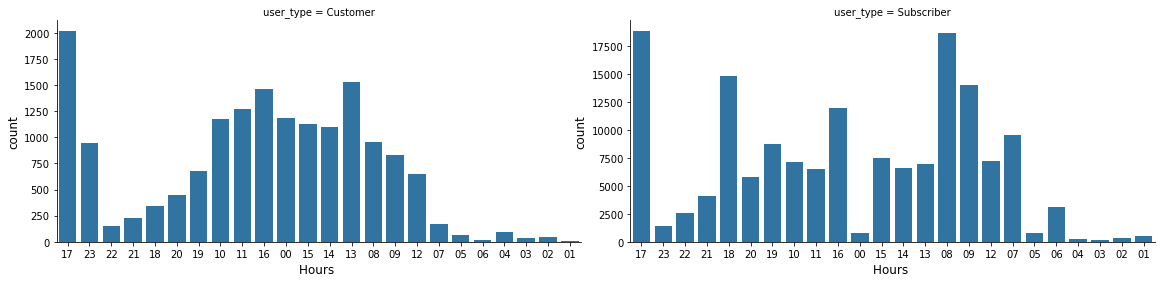

In [55]:
#count of rides during the whole day and in arelation of user type
user= sb.FacetGrid(data=bike_df,col='user_type', col_wrap = 2, height = 4, aspect=2, sharey=False)
user.map(sb.countplot, 'hour')
for i in range(2):
    user.axes[i].set_xlabel('Hours ',fontsize=12)
    user.axes[i].set_ylabel('count',fontsize=12);

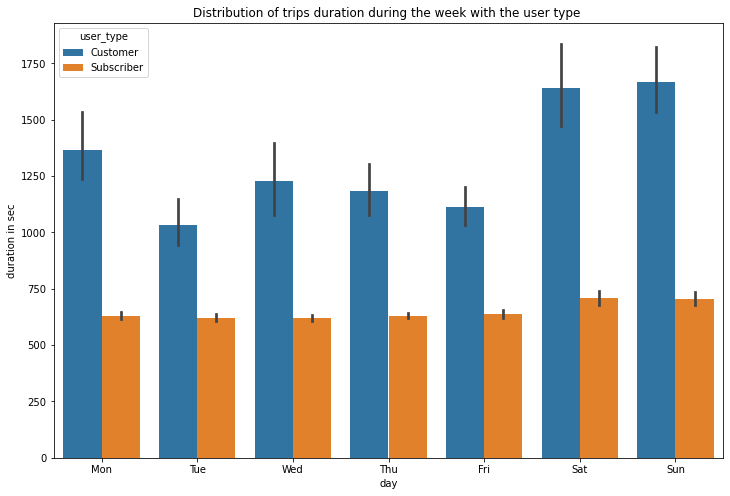

In [56]:
# trip duration in the whole week wwwith user type
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[0]
sb.barplot(data=bike_df, x='day', y='duration_sec', order=["Mon",'Tue','Wed','Thu','Fri','Sat','Sun'], hue='user_type')
plt.xlabel('day')
plt.ylabel('duration in sec')
plt.title("Distribution of trips duration during the week with the user type ", fontsize=12);

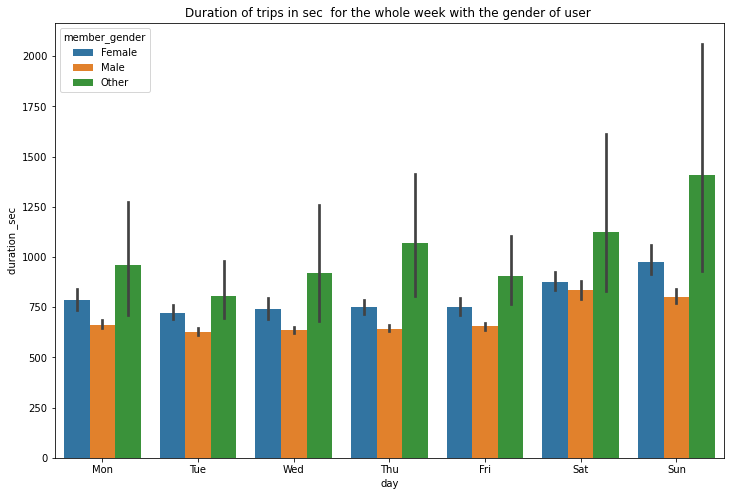

In [57]:
#duration in sec in the hole week with user gender
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[3]
sb.barplot(data=bike_df, x='day', y='duration_sec', order=["Mon",'Tue','Wed','Thu','Fri','Sat','Sun'], hue='member_gender')
plt.xlabel('day')
plt.ylabel('duration _sec')
plt.title("Duration of trips in sec  for the whole week with the gender of user ", fontsize=12);

### the users is in the most higer ratio for the both scriber and customer,but the subscriber is most biger user sample, even in the midnight when the scriber less than 100  the customer more than 1200 user, but the duration for the customer is higer than the scbscriber .

### did the user use the same bike for all his trips ?

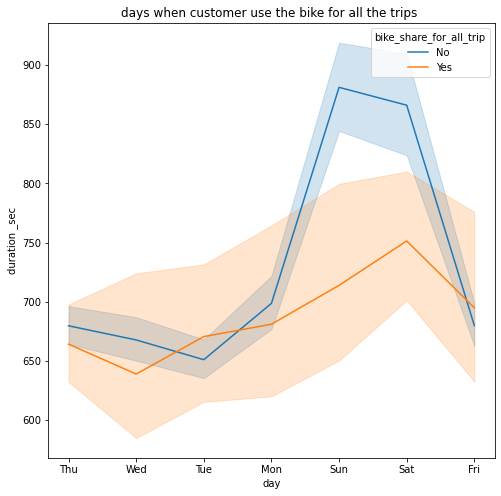

In [58]:
# plot for the customers who use the bike for all the trips in aspacific days 
plt.figure(figsize=(8,8))
base_color = sb.color_palette()[0]
sb.lineplot(data=bike_df, x='day', y='duration_sec', hue='bike_share_for_all_trip')
plt.xlabel('day')
plt.ylabel('duration _sec')
plt.title("days when customer use the bike for all the trips ", fontsize=12);

### usually in the week end the users didnt share thier bikes for all the trip, but they do in the some time during the rest of the week.



In [ ]:
!jupyter nbconvert Example_project_bikeford_slide_deck_Part2.ipynb --to slides --post serve  --no-input --no-prompt

